<a href="https://colab.research.google.com/github/SheidaTalei/FinalProject/blob/main/SheidaTalei_KMeanVsTfIDf_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SUBJECT: K-Mean Vs TF-IDF
###AUTHOR: Sheida Talei

In [57]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
nb_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0,nb_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileExistsError: ignored

In [1]:
# !pip install --target=$nb_path wordcloud-fa

Processing /root/.cache/pip/wheels/37/dd/e9/d6d14e3faa089ffa1bc80ae6f713ca91d2ffd0bb786edcdef5/wordcloud_fa-0.1.8-cp36-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f6/e7/f4ed7fac1993615b4ba92f473a77e27a3d210c5d23a000c2c98846963f9a/wordcloud-1.7.0-cp36-cp36m-manylinux1_x86_64.whl
Processing /root/.cache/pip/wheels/62/52/d8/bd0dcbf00f9e77e3bd0184285ed77dfa9c475dac494a5353d1/arabic_reshaper-2.1.1-cp36-none-any.whl
  Using cached https://files.pythonhosted.org/packages/33/b0/f942d146a2f457233baaafd6bdf624eba8e0f665045b4abd69d1b62d097d/python_bidi-0.4.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/22/13/5a7074bc11d20dbbb46239349ac3f85f7edc148b4cf68e9b8c2f8263830c/hazm-0.7.0-py3-none-any.whl
Processing /root/.cache/pip/wheels/66/15/54/4510dce8bb958b1cdd2c47425cbd1e1eecc0480ac9bb1fb9ab/libwapiti-0.2.1-cp36-cp36m-linux_x86_64.whl
Processing /root/.cache/pip/wheels/d1/ab/40/3bceea46922767e42986aef7606a600538ca80de6062dc266c/nltk-3.3-cp36-non

In [58]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
# from kneed import KneeLocator
from sklearn import metrics
from sklearn.decomposition import TruncatedSVD

In [59]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sn
from wordcloud_fa import WordCloudFa

In [60]:
#------------------------------------------Empty Rows Removal----------------------------------------------------------------
# This function Will: 1- Remove all empty rows from csv file 2- Save data to the same csv
def removeEmptyRows(fileName):
    df = pd.read_csv(fileName, encoding='utf-8-sig')
    df = df.dropna(subset=['text'], how='all', axis=0) 
    df.to_csv(fileName, header=True, encoding='utf-8-sig',  index=False)
    
    return df

In [61]:

X_and_Y = removeEmptyRows ('/content/drive/MyDrive/Final/train_temp.csv')
Y= X_and_Y.Label
X = X_and_Y.text

In [62]:
#--------------------------------------------------Loading StopWords ------------------------------------------
#Source of file: https://sites.google.com/site/kevinbouge/stopwords-lists
def getStopWord ():
    try:
        file = open('/content/drive/MyDrive/Final/stopwords_fa.txt', 'r', encoding='utf-8-sig')
        file_readed = file.read()
    
    finally:
        file.close()
        
    stopWord_Set = set(file_readed.split())
    return stopWord_Set


In [63]:
persian_stop_word = list(getStopWord())


In [64]:
vectorizer = TfidfVectorizer(stop_words= persian_stop_word ,  max_features = 2000 ) 
X_train_vector  = vectorizer.fit_transform(X)

In [65]:
#source: https://stackoverflow.com/questions/34725726/is-it-possible-apply-pca-on-any-text-classification
svd = TruncatedSVD(n_components=200)
X_svd = svd.fit_transform(X_train_vector)

In [66]:
#source: https://towardsdatascience.com/k-means-clustering-with-python-code-explained-5a792bd19548
num_cluster = 20
kmean=KMeans(n_clusters=num_cluster)
kmean.fit(X_svd)
labels = kmean.labels_
silhoute = metrics.silhouette_score(X_svd, labels, metric='euclidean')
print("silhouette_score is: ",silhoute)

silhouette_score is:  0.04650987011873098


In [67]:
centroids = kmean.cluster_centers_

In [14]:
#Source: https://stackoverflow.com/questions/26450673/sklearn-decomposition-top-terms
# weights = np.dot(kmean.cluster_centers_, svd.components_)

In [15]:
# weights.shape

In [68]:
#this functon calculates cos theta between two vectors
def similarity (vector_a, vector_b):
  ma = np.linalg.norm(vector_a)
  mb = np.linalg.norm(vector_b)
  sim = (np.matmul(vector_a,vector_b))/(ma * mb)
  return sim


In [69]:
centroid_matrix = np.zeros((num_cluster,num_cluster))

In [70]:

for i in range(num_cluster):
  for j in range(num_cluster):
    centroid_matrix[i][j] = similarity(centroids[i], centroids[j])


In [71]:
print(centroid_matrix)

[[1.         0.09498211 0.17021227 0.01764478 0.05998023 0.08653912
  0.16823401 0.08860989 0.11953755 0.27961163 0.12245255 0.01037042
  0.15246637 0.17506141 0.12126468 0.06988817 0.06576208 0.09052177
  0.08940162 0.02298132]
 [0.09498211 1.         0.12989528 0.06607205 0.07616877 0.14699585
  0.10918942 0.08176959 0.18565157 0.29066805 0.1689943  0.04079118
  0.08491734 0.13014762 0.19032124 0.11803591 0.11533678 0.1310922
  0.1136453  0.01781666]
 [0.17021227 0.12989528 1.         0.03616408 0.08153084 0.1521836
  0.1557157  0.12595682 0.15017862 0.37168396 0.14062867 0.02524508
  0.14625652 0.25679405 0.11379579 0.05924319 0.10963474 0.11552005
  0.12048698 0.01262402]
 [0.01764478 0.06607205 0.03616408 1.         0.02204826 0.05338452
  0.03580066 0.03213437 0.06862997 0.12066914 0.02673653 0.02093506
  0.01722541 0.03752652 0.03564962 0.03027362 0.11231448 0.03041304
  0.04673132 0.00118721]
 [0.05998023 0.07616877 0.08153084 0.02204826 1.         0.07691135
  0.10216411 0.081

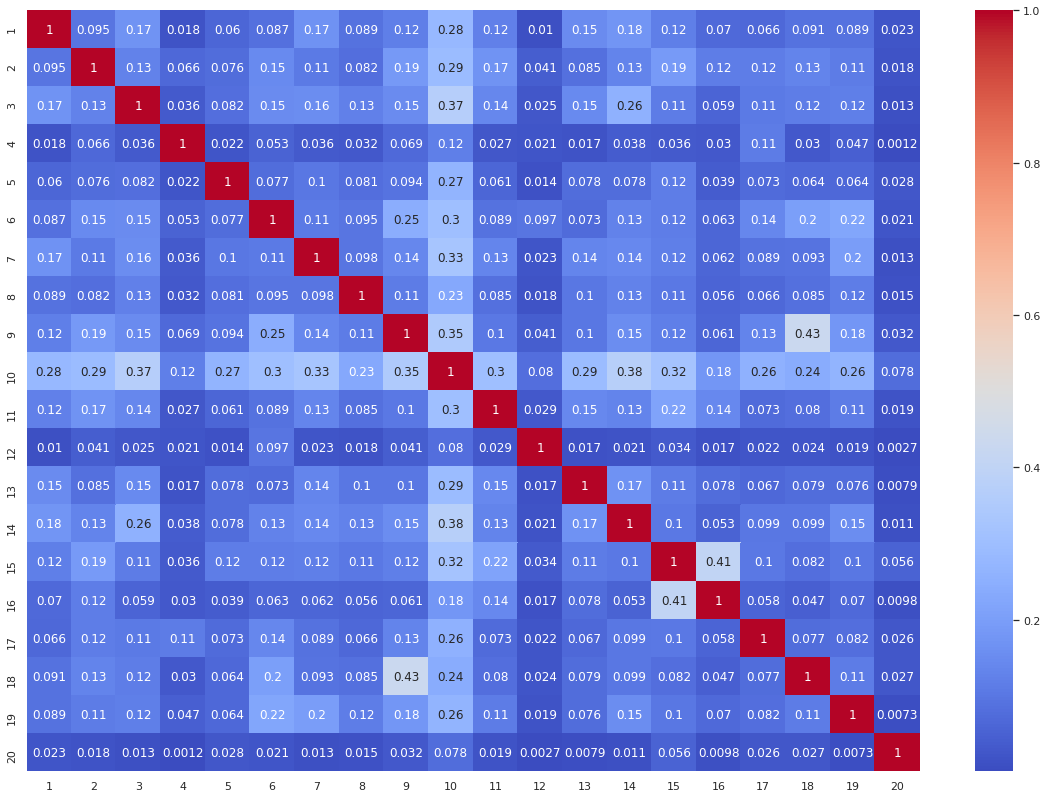

In [72]:
#Source: https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(centroid_matrix, range(1,num_cluster+1), range(1,num_cluster+1))
plt.figure(figsize = (20,14))
# sn.color_palette("vlag", as_cmap=True)
plot = sn.heatmap(df_cm, annot=True, cmap="coolwarm")
# plot.figure.savefig("/content/drive/MyDrive/Final/output_15.png")

In [ ]:
# text = " ".join(review for review in df.description)

In [3]:
from persian_wordcloud.wordcloud import PersianWordCloud

In [2]:
# !pip install --target=$nb_path persian_wordcloud

Processing /root/.cache/pip/wheels/d6/cb/3e/9cbd2b569d53b1442208fa3a4c66c2fc2bd6ade54231d08549/persian_wordcloud-1.3.1-cp36-none-any.whl


In [99]:
features = vectorizer.get_feature_names()
max_word = 200
text = ""
weights = np.abs(centroids)
for i in range(kmean.n_clusters):
  print("Cluster %d:" % i)
  top5 = np.argsort(-weights[i])[-200:]
  for j in top5:
    text += " " +features[j]  
    print("Word: "+ features[j] + " weight: "+ str(weights[i][j] ))
  text =  text.replace("gt", "")
  draw_cloudWord(text, "cloud_tfidf_"+str(i))
  text = ""


Cluster 0:
Word: اسلام weight: 0.17662504290563244
Word: gt weight: 0.12204368875330796
Word: ازاد weight: 0.0917380577381498
Word: استوری weight: 0.0821418417359791
Word: ازتون weight: 0.077859848425548
Word: ازار weight: 0.07777560144692565
Word: ازادی weight: 0.06451409739218565
Word: اسیب weight: 0.056059163213261876
Word: ازدواج weight: 0.04883993277291198
Word: اشک weight: 0.04692939771518377
Word: اشاره weight: 0.04432171566152447
Word: ارزو weight: 0.04390530954040678
Word: اشکار weight: 0.04363693307987453
Word: ات weight: 0.04231495723292882
Word: اسپری weight: 0.04217354560330592
Word: استارت weight: 0.041736591590654626
Word: اخر weight: 0.038132475438291576
Word: اسم weight: 0.035032198401890466
Word: ادمی weight: 0.03457603506224458
Word: اعصاب weight: 0.03224008231753856
Word: ابادان weight: 0.0316048930717632
Word: اجتماع weight: 0.03152928581870734
Word: ابادی weight: 0.031230510677358877
Word: ارای weight: 0.030211015784341787
Word: اصلا weight: 0.029433595540808148
W

In [87]:
# # true_k=3
# #Source: https://pythonprogramminglanguage.com/kmeans-text-clustering/
# print("Top terms per cluster:")
# order_centroids = kmean.cluster_centers_.argsort()[:, ::-1]
# terms = vectorizer.get_feature_names()

# for i in range(kmean.n_clusters):
#   print("Cluster %d:" % i),
#   for ind in order_centroids[i, :200]:

#     print(len(terms))
#     text +=  terms[ind] + " "

#       # print(' %s' % terms[ind])
#   text =  text.replace("gt", "")
#   print(text)
#   draw_cloudWord(text, "cloud_tfidf_"+str(i))
#   print

##word cloud

In [89]:
#source: https://www.datacamp.com/community/tutorials/wordcloud-python
#https://pypi.org/project/wordcloud-fa/
def draw_cloudWord(text, fileName):

  wordcloud = WordCloudFa(no_reshape=False,  include_numbers=False, collocations=False, width=800, height=400,background_color="white")
  wc = wordcloud.generate(text)
  # frequencies = wordcloud.process_text(text)
  # wc = wordcloud.generate_from_frequencies(frequencies)
  image = wc.to_image()
  image.show()
  image.save('/content/drive/MyDrive/Final/cloudFolder/'+fileName +".png")



In [ ]:
# y_kmeans = kmean.predict(X_train_vector)

In [ ]:
#we can see our three centers by using the following command
# kmean.cluster_centers_

array([[0.00019623, 0.00050958, 0.00101709, ..., 0.00068905, 0.00065501,
        0.00093844],
       [0.00021345, 0.00097809, 0.00040234, ..., 0.0001954 , 0.        ,
        0.00247014],
       [0.        , 0.00133463, 0.00429853, ..., 0.00083457, 0.00048044,
        0.0003946 ]])

In [ ]:
#To check the labels created, we can use the following command. It gives the labels created for our data
kmean.labels_

array([0, 0, 2, ..., 1, 0, 0], dtype=int32)

In [ ]:
#Let’s evaluate how well the formed clusters are. To do that, we will calculate the inertia of the clusters:
kmean.inertia_

40767.12471680361

In [ ]:
frame = pd.DataFrame(X_train_vector)
frame['cluster'] = y_kmeans
frame['cluster'].value_counts()

0    32342
2     6810
1     2662
Name: cluster, dtype: int64

/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


100


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


500


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


1000


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


2000


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


3000


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


4000


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


5000


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


6000


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


8000


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


10000


Text(0, 0.5, 'silhouette_score')

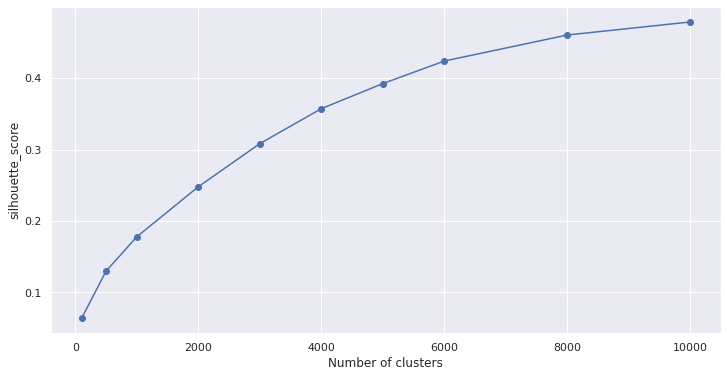

In [ ]:
# fitting multiple k-means algorithms and storing the values in an empty list
#source: https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
#source:https://realpython.com/k-means-clustering-python/
SSE = []

clusterList = [100,  500,1000,2000,3000,4000,5000 ,6000,8000,10000]
for cluster in clusterList:
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(X_svd)
    # SSE.append(kmeans.inertia_)
    labels = kmeans.labels_
    SSE.append(metrics.silhouette_score(X_svd, labels, metric='euclidean'))
    # clusterList.append(cluster)
    print (cluster)
    # cluster = cluster + 10

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':clusterList, 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')

Text(0, 0.5, 'silhouette_score')

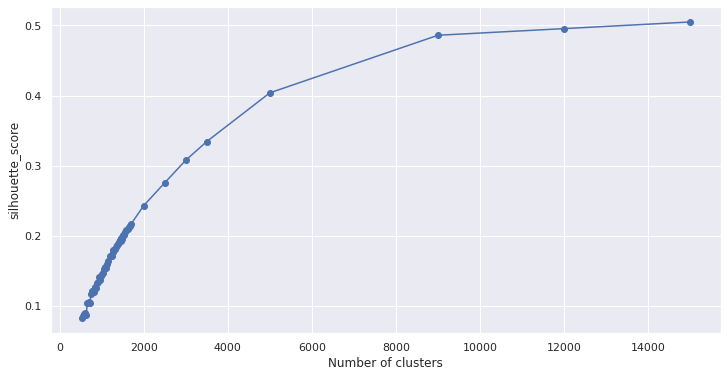

In [ ]:
 
clusterList = [100,  500,1000,2000,3000,3500,4000,4500,5000]
frame = pd.DataFrame({'Cluster':clusterList, 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')

306


Text(0, 0.5, 'silhouette_score')

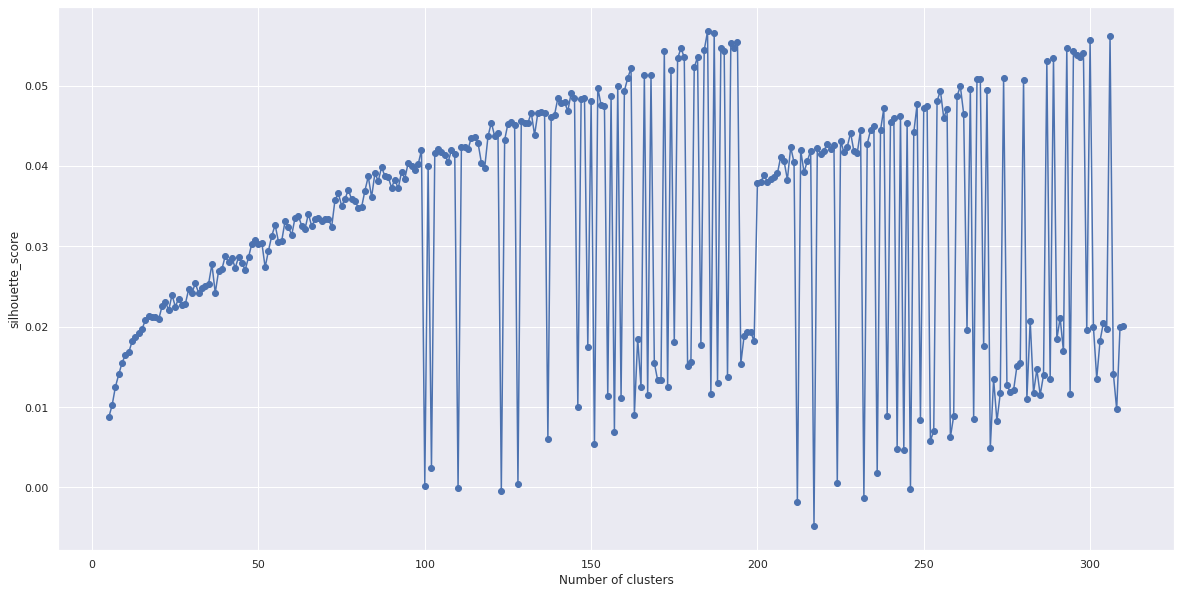

In [ ]:
print(len (SSE))
frame = pd.DataFrame({'Cluster':range(5,311), 'SSE':SSE})
plt.figure(figsize=(20,10))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')

Text(0, 0.5, 'Inertia')

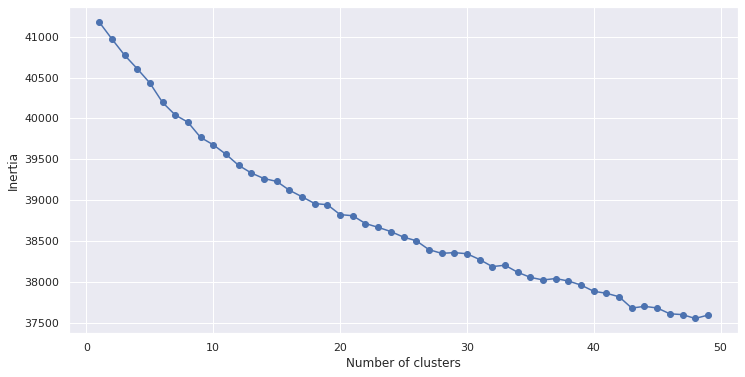

In [ ]:
frame = pd.DataFrame({'Cluster':range(1,50), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
kl = KneeLocator(range(1, 50), SSE, curve="convex", direction="decreasing")
true_k = kl.elbow
print (true_k)

22


In [ ]:
true_k= 22
kmean=KMeans(n_clusters=true_k)
kmean.fit(X_train_vector)

KMeans(n_clusters=22)

In [ ]:
# true_k=3
#Source: https://pythonprogramminglanguage.com/kmeans-text-clustering/
print("Top terms per cluster:")
order_centroids = kmean.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :50]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 بهائی
 شهروند
 ایران
 ائین
 سال
 مخفی
 جامعه
 بهائیان
 ساکن
 زندان
 ویهودی
 درایران
 اسلام
 نفوذ
 یهود
 بازداشت
 ان
 دین
 اسرائیل
 ازاد
 خاندان
 دیانت
 حبس
 کن
 فرقه
 بهاالله
 پدر
 شبکه
 بهائیت
 ایین
 قرار
 دانشگاه
 اطلاعات
 باب
 شیراز
 تو
 جهانی
 پیامبر
 حکومت
 اینکه
 دار
 حکم
 روز
 ماه
 محکوم
 انقلاب
 انها
 وثیقه
 تاریخ
 امنیت
Cluster 1:
 دوست
 دار
 عزیز
 خیلی
 کن
 تو
 باش
 دارن
 عوض
 پسر
 خوب
 وقت
 بیشتر
 شو
 دارم
 دیگه
 الان
 امنیت
 منو
 نداره
 گو
 کار
 دل
 ممنون
 همیشه
 عشق
 ادم
 چقدر
 خودم
 بین
 واقعا
 دید
 دختر
 اینکه
 چقد
 اصلا
 دشمن
 حتی
 زیاد
 فکر
 ان
 دست
 حالا
 کاش
 ای
 دنیا
 میکنم
 واسه
 کنه
 خدا
Cluster 2:
 امام
 حسن
 عسکر
 زمان
 السلام
 علیه
 فرمود
 فرما
 عج
 ان
 شهادت
 بیعت
 عسگر
 خدا
 خداوند
 مهدی
 تسلیت
 کند
 العقول
 تحف
 دل
 حضرت
 الله
 غیبت
 مؤمن
 ظهور
 امامت
 باش
 فرزند
 کن
 حال
 ای
 نمود
 باد
 نمی
 کار
 هرکس
 شیعیان
 انجام
 ترین
 اله
 روز
 حسین
 امشب
 زمین
 فرج
 زشت
 مولا
 عصر
 انسان
Cluster 3:
 کن
 فکر
 کار
 گو
 بین
 الان
 دید
 

In [ ]:
labels=kmean.labels_

In [ ]:

silhouette_score = metrics.silhouette_score(X_train_vector, labels, metric='euclidean')
print ("Silhouette_score: ",silhouette_score )


Silhouette_score:  0.023245171823646608
